In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# The spiking of an MT neuron

Ex 1: load the spiking of an MT neuron

In [2]:
mt_neuron_path = '../freedman2006/MT/dseao01.mat'

In [3]:
mt_neuron = loadmat(mt_neuron_path)

In [6]:
mt_neuron.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trial_raster', 'samp_direction_this_trial', 'test_direction_this_trial'])

In [8]:
# what shape?
mt_neuron['trial_raster'].shape

(246, 2700)

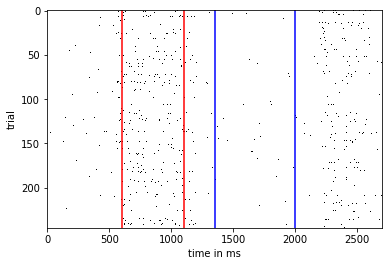

In [15]:
# plot this raster using plt.imshow
plt.imshow(mt_neuron['trial_raster'], aspect='auto', cmap='gray_r')
plt.xlabel('time in ms')
plt.ylabel('trial')
# plot vertical lines to delineate epochs
# initial stimulus presentation
plt.axvline(600, c='r')
plt.axvline(1100, c='r')
# delay period
plt.axvline(1350, c='b')
plt.axvline(2000, c='b')

In [19]:
# mt_neuron.keys()
# the trials are not ordered!
mt_neuron['samp_direction_this_trial']

array([[150, 180, 240,  90,  90, 300, 240, 210,  60,  30,  60, 300,  30,
        150,  90, 150, 270, 300,  90,  60,  30, 180, 180,  30,  30, 240,
        180, 330, 150, 120, 180, 330, 240,  60,   0,  30, 120, 330, 330,
         90, 120, 240, 150, 300, 270,   0, 240,  90, 180,  90,  30, 180,
        270, 300, 270, 240, 330, 240, 120, 240, 180, 270, 270, 240,  90,
         60,   0, 300, 330,  30,   0, 120, 240,  60,  30, 240, 270, 150,
          0, 270, 240, 210, 180,  30, 330, 240,   0, 150,   0, 180,  90,
          0,   0, 330, 300,   0,  30, 120, 240,  60, 270, 300,   0,  90,
          0, 330, 180,  60,  30,  60, 300,  30, 270, 270,  90, 180, 210,
        150,  90, 270, 150, 330, 180, 180, 180, 330, 180, 150,  30,   0,
        180, 150,  60, 300, 180, 150, 120, 240,  60,  60, 210, 120, 120,
        330,  60, 150, 330, 300, 210,   0,   0, 180, 150, 240, 150, 300,
        210, 300, 180,   0,  60, 240,   0, 240, 300, 150, 270,  60,  60,
        330,  60, 210, 150, 180, 150, 180,  90, 240

In [20]:
np.unique(mt_neuron['samp_direction_this_trial'])

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330],
      dtype=uint16)

In [21]:
# Exercise sort these trials

In [41]:
# example

unsorted_array = np.random.rand(2)

In [42]:
unsorted_array

array([0.74849261, 0.15549432])

In [43]:
indices = np.argsort(unsorted_array)
indices

array([1, 0])

In [44]:
sorted_array = unsorted_array[indices]

In [45]:
sorted_array

array([0.15549432, 0.74849261])

In [63]:
# introducing
np.random.rand(3,1).squeeze().shape

(3,)

In [58]:
unsorted_directions = mt_neuron['samp_direction_this_trial'].squeeze()

unsorted_directions.shape

(246,)

In [59]:
sorted_indices = np.argsort(unsorted_directions)
sorted_indices.shape

(246,)

In [60]:
# Ex: use these sorted indices to plot an raster with sorted rows

In [61]:
raster = mt_neuron['trial_raster']

In [52]:
raster.shape

(246, 2700)

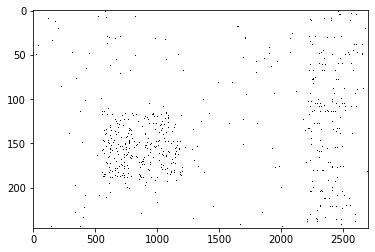

In [66]:
plt.imshow(raster[sorted_indices], aspect='auto', cmap='gray_r')

In [67]:
# Ex: are there as many trials for each direction?
# hint: use np.unique(..., return_counts=True)

In [69]:
unique_dirs, count_dirs = np.unique(unsorted_directions, return_counts=True)
print(count_dirs)

[22 22 24 14 14 20 30 14 30 17 22 17]


In [ ]:
# Ex: add lines to our raster plot to delineate trial types 
# hint: use plt.axhline
# hint: use np.cumsum

In [76]:
cum_counts = np.cumsum(count_dirs)

# for c in cum_counts:
#     print(c)

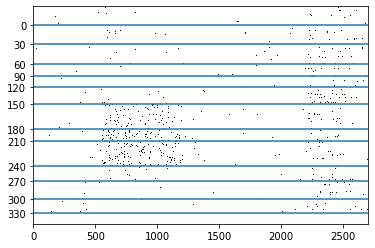

In [75]:
plt.imshow(raster[sorted_indices], aspect='auto', cmap='gray_r')
for c in cum_counts:
    plt.axhline(c)
plt.yticks(ticks=cum_counts, labels=unique_dirs)
plt.show()

In [ ]:
# this plot is insufficient, we need a tuning curve!
# EX: compute the mean firing rate of this neuron during the sampling period (600 to 1100) for each direction
# then plot direction against mean firing
# note: firing rates are measured in spikes/sec (Hz)

In [92]:
count_start = 600
count_stop = 1100
conversion = 1000 / (count_stop - count_start)

direction_spike_rate = []
for d in unique_dirs:
    trials_in_d = unsorted_directions == d
    raster_slice = raster[trials_in_d, count_start:count_stop]
    spike_count = np.sum(raster_slice, axis=1)
    mean_spike_count = np.mean(spike_count)

    mean_spike_rate = mean_spike_count * conversion

    direction_spike_rate.append(mean_spike_rate)

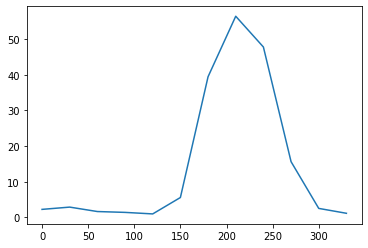

In [96]:
plt.plot(unique_dirs, direction_spike_rate)
plt.show()